In [1]:
# import utboost as utb
# from utboost import UTBClassifier, UTBRegressor
# from causalml.inference.meta import LRSRegressor
# from causalml.inference.meta import XGBTRegressor, MLPTRegressor
# from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor,  BaseDRRegressor
# from causalml.inference.iv import BaseDRIVRegressor
# from causalml.metrics import auuc_score
# from causalml.dataset import synthetic_data
# from causalml.inference.tree import UpliftRandomForestClassifier
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklift.viz import plot_uplift_curve
from sklift.metrics import uplift_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")
df_train.head()

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment
0,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-07-04,0,1
1,NaN,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-06-06,0,1
2,0.0,1.0,Web,2.0,seo,0,NaN,15000.0,PLT,0.0,...,NaN,0,NaN,0.0,-1.2,1.0,0,2024-07-21,1,1
3,0.0,1.0,MB,2.0,One Click Offer,0,91.0,260000.0,PLT,0.0,...,1.0,0,NaN,1.0,-1.2,1.0,0,2024-05-23,0,1
4,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,130000.0,PLT,0.0,...,NaN,0,1.0,0.0,-1.2,1.0,0,2024-06-28,0,1


In [4]:
df_train.shape

(297250, 152)

In [3]:
df_train.describe()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,successful_utilization,treatment
count,182122.000000,279015.0,286771.000000,297250.000000,279344.000000,286771.000000,294199.000000,238685.000000,250854.000000,182122.000000,...,242704.000000,138662.000000,297250.000000,242704.000000,294199.000000,294413.000000,256782.000000,297250.000000,297250.000000,297250.000000
mean,226.487834,1.0,80.713643,0.573181,21.836155,114473.119667,0.046533,0.036080,0.036314,21.760767,...,0.016176,0.673076,0.126718,0.775805,0.110680,-0.852152,0.984241,0.159452,0.240108,0.950318
std,1963.729511,0.0,57.299577,0.494616,33.271489,91998.071369,0.210434,0.043743,0.042581,76.904140,...,0.126153,0.767278,0.399798,0.417052,0.313683,0.922945,0.124474,0.462034,0.427149,0.217288
min,-99999.000000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000061,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,2.000000,0.000000,4.000000,36000.000000,0.000000,0.008267,0.008418,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,-1.200000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,1.0,123.000000,1.000000,10.000000,95000.000000,0.000000,0.020503,0.020864,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,-1.200000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,1.0,123.000000,1.000000,24.000000,160000.000000,0.000000,0.047740,0.048499,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,-1.200000,1.000000,0.000000,0.000000,1.000000
max,182712.000000,1.0,123.000000,1.000000,1417.000000,770000.000000,1.000000,0.885421,0.670719,668.800000,...,1.000000,11.000000,9.000000,1.000000,1.000000,3.000000,1.000000,8.000000,1.000000,1.000000


In [19]:
df_train.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

In [6]:
df_train.dtypes[df_train.dtypes == np.object_]

cc_2          object
cc_4          object
cc_6          object
retro_date    object
dtype: object

In [9]:
df_train["cc_6"].nunique()

11

In [159]:
print((df_train['treatment'] == 0).sum(), (df_train['treatment'] == 1).sum())

14768 282482


In [160]:
print((df_train['successful_utilization'] == 0).sum(), (df_train['successful_utilization'] == 1).sum())

225878 71372


In [14]:
(df_train.isna().count() - df_train.count()).sort_values(ascending=False)

feature_23        284741
feature_16        278988
partner_22        278303
bki_20            224048
application_12    217768
                   ...  
application_6          0
application_7          0
application_8          0
application_9          0
treatment              0
Length: 152, dtype: int64

In [17]:
(df_train["feature_23"].isna() == False).sum()

12509

In [18]:
(df_train.select_dtypes(include=["object"]).isna().count() - df_train.select_dtypes(include=["object"]).count())

cc_2          10479
cc_4          10482
cc_6          10479
retro_date        0
dtype: int64

In [3]:
df_positive = df_train[df_train['successful_utilization'] == 1].copy()
df_negative = df_train[df_train['successful_utilization'] == 0].copy()

numerical_features = df_train.select_dtypes(include=["float64", "int64"]).columns
object_features = df_train.select_dtypes(include=["object"]).columns

In [4]:
for feature in numerical_features:
	df_train.loc[:, feature] = df_train[feature].fillna(df_train[feature]\
														   .median())
	if feature != 'successful_utilization' and feature != 'treatment':
		df_test.loc[:, feature] = df_test[feature].fillna(df_test[feature]\
														   .median())
	
for feature in object_features:
	df_train.loc[:, feature] = df_train[feature].fillna(df_train[feature]\
														   .mode()[0])
	if feature != 'successful_utilization' and feature != 'treatment':
		df_test.loc[:, feature] = df_test[feature].fillna(df_test[feature]\
														   .mode()[0])


In [451]:
df_train

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment
0,0.0,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-07-04,0,1
1,0.0,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-06-06,0,1
2,0.0,1.0,Web,2.0,seo,0,10.0,15000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-07-21,1,1
3,0.0,1.0,MB,2.0,One Click Offer,0,91.0,260000.0,PLT,0.0,...,1.0,0,1.0,1.0,-1.2,1.0,0,2024-05-23,0,1
4,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,130000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-06-28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,0.0,1.0,Representatives,123.0,Первичная ДК,1,34.0,95000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-05-13,1,1
297246,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,83000.0,PLT,0.0,...,1.0,0,1.0,0.0,-1.2,1.0,0,2024-07-08,0,1
297247,0.0,1.0,Mobile Warm,2.0,TOOS cor clients,0,2.0,170000.0,PLT,0.0,...,1.0,0,1.0,0.0,1.0,1.0,0,2024-06-12,0,1
297248,0.0,1.0,Representatives,123.0,Первичная ДК,1,5.0,15000.0,PLT,0.0,...,0.0,0,1.0,0.0,-1.2,1.0,0,2024-06-02,1,1


In [5]:
df_train['retro_date'] = pd.to_datetime(df_train['retro_date']).astype(np.int64)

df_train['retro_date'] = (df_train['retro_date'] - df_train['retro_date'].min()) / (df_train['retro_date'].max() - df_train['retro_date'].min())

df_test['retro_date'] = pd.to_datetime(df_test['retro_date']).astype(np.int64)

df_test['retro_date'] = (df_test['retro_date'] - df_test['retro_date'].min()) / (df_test['retro_date'].max() - df_test['retro_date'].min())

df_train['retro_date'].head()

0    0.741573
1    0.426966
2    0.932584
3    0.269663
4    0.674157
Name: retro_date, dtype: float64

In [287]:
df_train['retro_date'].describe()

count    297250.000000
mean          0.459409
std           0.284111
min           0.000000
25%           0.213483
50%           0.449438
75%           0.685393
max           1.000000
Name: retro_date, dtype: float64

In [288]:
data_encoded = df_train.copy()
encoding = {}

for feature in data_encoded.select_dtypes(include=["object"]).columns:
	data_encoded[feature], codes = data_encoded[feature].factorize()
	encoding[feature] = list(codes)
	df_test[feature] = df_test[feature].apply(lambda val: encoding[feature].index(val))
df_test.head()


,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,bki_46,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date
0,0.0,1.0,1,123.0,1,0,6.0,96000.0,0,0.0,...,373942.0,0.0,1.0,0,0.0,0.0,-1.2,1.0,0,0.561798
1,0.0,1.0,1,123.0,1,0,45.0,96000.0,0,0.0,...,0.0,0.0,0.0,0,0.0,1.0,-1.2,1.0,0,0.112360
2,0.0,1.0,3,2.0,7,0,13.0,299000.0,0,0.0,...,9724333.0,0.0,1.0,0,1.0,0.0,-1.2,1.0,0,0.348315
3,0.0,1.0,1,123.0,18,1,158.0,140000.0,0,0.0,...,0.0,0.0,1.0,0,1.0,0.0,-1.2,1.0,0,0.314607
4,0.0,1.0,1,123.0,1,0,36.0,170000.0,0,0.0,...,2237284.0,0.0,0.0,0,1.0,0.0,-1.2,1.0,0,0.449438


### SKIP

In [651]:
model = UTBClassifier(
    ensemble_type='boosting',
    criterion='gbm',
    iterations=200,
    max_depth=4
)

In [435]:
model.fit(
    X=X_train, 
    ti=ti_train, 
    y=y_train,
	eval_sets=[(X_valid, ti_valid, y_valid)]
)

   0:	train-qini_coff: 0.027227	valid-0-qini_coff: 0.035728	total: 0.07s
  10:	train-qini_coff: 0.068993	valid-0-qini_coff: 0.052384	total: 0.71s
  20:	train-qini_coff: 0.082512	valid-0-qini_coff: 0.059096	total: 1.30s
  30:	train-qini_coff: 0.099837	valid-0-qini_coff: 0.068622	total: 1.87s
  40:	train-qini_coff: 0.118263	valid-0-qini_coff: 0.072062	total: 2.44s
  50:	train-qini_coff: 0.137187	valid-0-qini_coff: 0.073374	total: 2.91s
  60:	train-qini_coff: 0.156312	valid-0-qini_coff: 0.075519	total: 3.45s
  70:	train-qini_coff: 0.167733	valid-0-qini_coff: 0.073982	total: 3.91s
  80:	train-qini_coff: 0.179840	valid-0-qini_coff: 0.076351	total: 4.44s
  90:	train-qini_coff: 0.193475	valid-0-qini_coff: 0.076458	total: 4.93s
 100:	train-qini_coff: 0.204285	valid-0-qini_coff: 0.076080	total: 5.43s
 110:	train-qini_coff: 0.219223	valid-0-qini_coff: 0.083170	total: 5.90s
 120:	train-qini_coff: 0.229716	valid-0-qini_coff: 0.080768	total: 6.41s
 130:	train-qini_coff: 0.240002	valid-0-qini_coff: 

In [436]:
preds = model.predict(X_valid)
uplift_preds = preds[:, 1] - preds[:, 0]

In [428]:
uplift_preds

array([0.00740477, 0.06671886, 0.0258073 , ..., 0.0238385 , 0.06095144,
       0.13124928])

In [438]:
uplift_auc_score(y_true=y_valid, uplift=uplift_preds, treatment=ti_valid)

0.07725040364701359

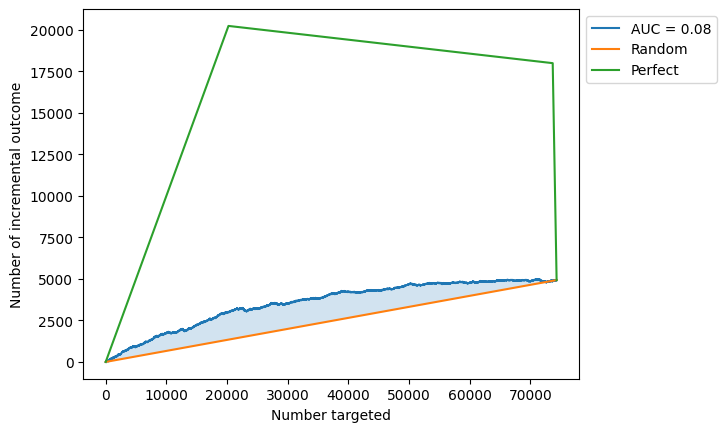

In [437]:
plot_uplift_curve(y_true=y_valid, uplift=uplift_preds, treatment=ti_valid, perfect=True)

In [294]:
preds = model.predict(df_test.values)
uplift_preds = preds[:, 1] - preds[:, 0]

### END SKIP

In [6]:
from catboost import CatBoostClassifier

In [5]:
class CrossFoldEncoder:
    def __init__(self, encoder, **kwargs):
        self.encoder_ = encoder
        self.kwargs_ = kwargs  # keyword arguments for the encoder
        self.cv_ = KFold(n_splits=5)

    # Fit an encoder on one split and transform the feature on the
    # other. Iterating over the splits in all folds gives a complete
    # transformation. We also now have one trained encoder on each
    # fold.
    def fit_transform(self, X, y, cols):
        self.fitted_encoders_ = []
        self.cols_ = cols
        X_encoded = []
        for idx_encode, idx_train in self.cv_.split(X):
            fitted_encoder = self.encoder_(cols=cols, **self.kwargs_)
            fitted_encoder.fit(
                X.iloc[idx_encode, :], y.iloc[idx_encode],
            )
            X_encoded.append(fitted_encoder.transform(X.iloc[idx_train, :])[cols])
            self.fitted_encoders_.append(fitted_encoder)
        X_encoded = pd.concat(X_encoded)
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        return X_encoded

    # To transform the test data, average the encodings learned from
    # each fold.
    def transform(self, X):
        from functools import reduce

        X_encoded_list = []
        for fitted_encoder in self.fitted_encoders_:
            X_encoded = fitted_encoder.transform(X)
            X_encoded_list.append(X_encoded[self.cols_])
        X_encoded = reduce(
            lambda x, y: x.add(y, fill_value=0), X_encoded_list
        ) / len(X_encoded_list)
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        return X_encoded

In [6]:
from category_encoders import MEstimateEncoder
new_data = df_train.copy()

encoder = CrossFoldEncoder(MEstimateEncoder, m =5.0)

encoded = encoder.fit_transform(new_data[new_data.columns.drop(["successful_utilization", "treatment"])], new_data["successful_utilization"], new_data.select_dtypes(include=["object"]).columns.to_list())

new_data = pd.concat([new_data, encoded], axis=1)
new_data.drop(columns=["cc_2", "cc_4", "cc_6"], inplace=True)
new_data.head()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_2_encoded,cc_4_encoded,cc_6_encoded,retro_date_encoded
0,0.0,1.0,123.0,1,14.0,147000.0,0.0,0.008663,0.008663,0.0,...,-1.2,1.0,0,2024-07-04,0,1,0.216919,0.203296,0.240778,0.274410
1,0.0,1.0,43.0,0,1.0,120000.0,0.0,0.022936,0.022936,0.0,...,-1.2,1.0,0,2024-06-06,0,1,0.092571,0.073206,0.240778,0.251278
2,0.0,1.0,2.0,0,10.0,15000.0,0.0,0.020503,0.020864,0.0,...,-1.2,1.0,0,2024-07-21,1,1,0.308373,0.325174,0.240778,0.271304
3,0.0,1.0,2.0,0,91.0,260000.0,0.0,0.020503,0.020864,0.0,...,-1.2,1.0,0,2024-05-23,0,1,0.344218,0.313144,0.240778,0.239066
4,0.0,1.0,123.0,1,1.0,130000.0,0.0,0.029764,0.029764,0.0,...,-1.2,1.0,0,2024-06-28,0,1,0.216919,0.203296,0.240778,0.257416


In [58]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y.to_numpy().ravel(),  random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores: pd.Series):
	width = np.arange(len(scores))
	sns.barplot(x=scores, y=scores.index)

In [103]:
mi_scores = make_mi_scores(new_data.drop(columns=['successful_utilization', 'treatment']).iloc[:100000], new_data.iloc[:100000]['successful_utilization']).sort_values(ascending=False)

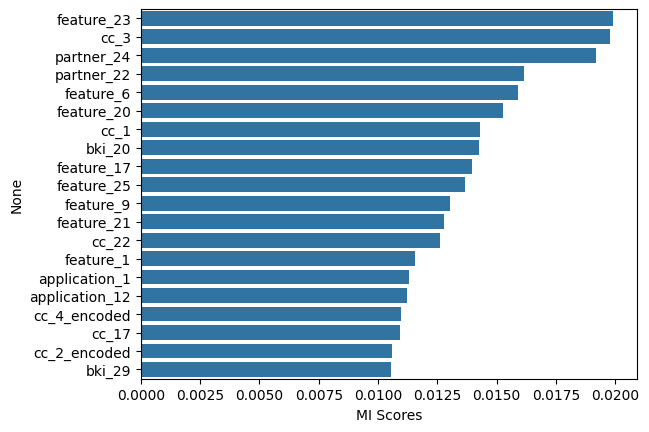

In [104]:
plot_mi_scores(mi_scores.head(20))

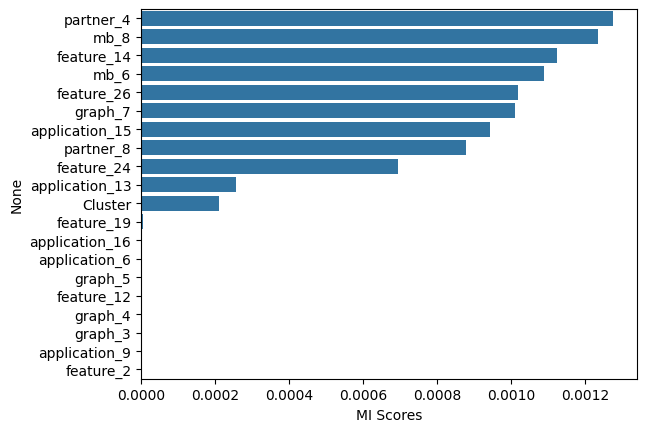

In [105]:
plot_mi_scores(mi_scores.tail(20))

In [107]:
drop = mi_scores.tail(20).index.tolist()

In [110]:
new_data.drop(columns=drop, inplace=True)
new_data.head()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,cc_7,cc_8,application_2,partner_1,...,cc_21,feature_25,cc_22,partner_24,retro_date,successful_utilization,treatment,cc_2_encoded,cc_4_encoded,cc_6_encoded
0,0.0,1.0,123.0,1,14.0,147000.0,0.008663,0.008663,0.0,-3.425132,...,1.0,1.0,-1.2,1.0,0.741573,0,1,0.216919,0.203296,0.240778
1,0.0,1.0,43.0,0,1.0,120000.0,0.022936,0.022936,0.0,-2.887847,...,1.0,1.0,-1.2,1.0,0.426966,0,1,0.092571,0.073206,0.240778
2,0.0,1.0,2.0,0,10.0,15000.0,0.020503,0.020864,0.0,-3.057033,...,1.0,1.0,-1.2,1.0,0.932584,1,1,0.308373,0.325174,0.240778
3,0.0,1.0,2.0,0,91.0,260000.0,0.020503,0.020864,0.0,-2.537447,...,1.0,1.0,-1.2,1.0,0.269663,0,1,0.344218,0.313144,0.240778
4,0.0,1.0,123.0,1,1.0,130000.0,0.029764,0.029764,0.0,-1.886483,...,1.0,1.0,-1.2,1.0,0.674157,0,1,0.216919,0.203296,0.240778


In [ ]:

from sklearn.cluster import KMeans

cluster_features = new_data.columns

def cluster_labels(df, features, kmeans, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / (X_scaled.std(axis=0) + 0.03)
    X_new = pd.DataFrame()
    X_new["Cluster"] = kmeans.fit_predict(X_scaled)
    return X_new, kmeans


def cluster_distance(df, features, model : KMeans, test=False, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / (X_scaled.std(axis=0) + 0.03)
    if test:
        X_cd = kmeans.transform(X_scaled)
    else:
        X_cd = kmeans.fit_transform(X_scaled)
    # Label features and join to dataset
    X_cd = pd.DataFrame(
        X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])]
    )
    return X_cd, kmeans

kmeans = KMeans(n_clusters=7, n_init=10, random_state=0)

X_cd, kmeans = cluster_distance(new_data, cluster_features, kmeans)
X_cd.head()

C:\Users\ignat\AppData\Local\Temp\ipykernel_596008\2848269812.py:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X_scaled - X_scaled.mean(axis=0)) / (X_scaled.std(axis=0) + 0.03)
C:\Users\ignat\AppData\Local\Temp\ipykernel_596008\2848269812.py:17: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X_scaled - X_scaled.mean(axis=0)) / (X_scaled.std(axis=0) + 0.03)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [97]:
new_data = pd.concat([new_data, X_cd], axis=1)
new_data.head()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_2_encoded,cc_4_encoded,cc_6_encoded,Cluster
0,0.0,1.0,123.0,1,14.0,147000.0,0.0,0.008663,0.008663,0.0,...,-1.2,1.0,0,0.741573,0,1,0.216919,0.203296,0.240778,1
1,0.0,1.0,43.0,0,1.0,120000.0,0.0,0.022936,0.022936,0.0,...,-1.2,1.0,0,0.426966,0,1,0.092571,0.073206,0.240778,16
2,0.0,1.0,2.0,0,10.0,15000.0,0.0,0.020503,0.020864,0.0,...,-1.2,1.0,0,0.932584,1,1,0.308373,0.325174,0.240778,12
3,0.0,1.0,2.0,0,91.0,260000.0,0.0,0.020503,0.020864,0.0,...,-1.2,1.0,0,0.269663,0,1,0.344218,0.313144,0.240778,19
4,0.0,1.0,123.0,1,1.0,130000.0,0.0,0.029764,0.029764,0.0,...,-1.2,1.0,0,0.674157,0,1,0.216919,0.203296,0.240778,13


In [49]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
dist = 1 - cosine_similarity(X_cd[:10000])

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(10000, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


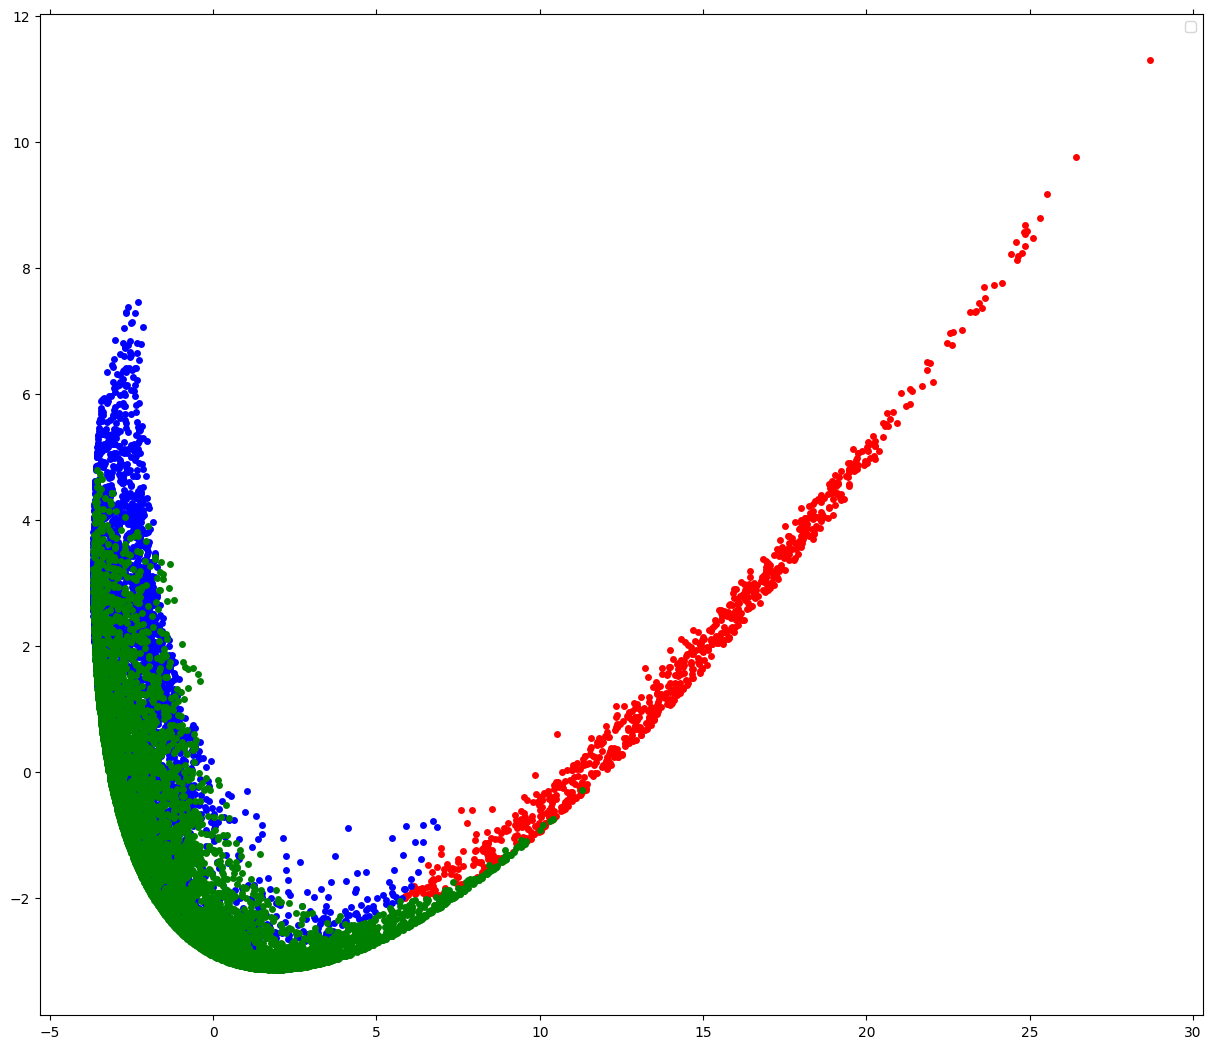

In [64]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
		  6: 'grey'}

pca_df = pd.DataFrame({'x': x, 'y':y, 'label':kmeans.labels_[:10000]}) 
groups = pca_df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
plt.show()

In [11]:
train_data = new_data.copy()

In [12]:
train_data

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_2_encoded,cc_4_encoded,cc_6_encoded
0,0.0,1.0,123.0,1,14.0,147000.0,0.0,0.008663,0.008663,0.0,...,0.0,-1.2,1.0,0,0.741573,0,1,0.216919,0.203296,0.240778
1,0.0,1.0,43.0,0,1.0,120000.0,0.0,0.022936,0.022936,0.0,...,0.0,-1.2,1.0,0,0.426966,0,1,0.092571,0.073206,0.240778
2,0.0,1.0,2.0,0,10.0,15000.0,0.0,0.020503,0.020864,0.0,...,0.0,-1.2,1.0,0,0.932584,1,1,0.308373,0.325174,0.240778
3,0.0,1.0,2.0,0,91.0,260000.0,0.0,0.020503,0.020864,0.0,...,1.0,-1.2,1.0,0,0.269663,0,1,0.344218,0.313144,0.240778
4,0.0,1.0,123.0,1,1.0,130000.0,0.0,0.029764,0.029764,0.0,...,0.0,-1.2,1.0,0,0.674157,0,1,0.216919,0.203296,0.240778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,0.0,1.0,123.0,1,34.0,95000.0,0.0,0.086722,0.086722,0.0,...,0.0,-1.2,1.0,0,0.157303,1,1,0.216403,0.201575,0.240072
297246,0.0,1.0,123.0,1,1.0,83000.0,0.0,0.025878,0.025878,0.0,...,0.0,-1.2,1.0,0,0.786517,0,1,0.216403,0.201575,0.240072
297247,0.0,1.0,2.0,0,2.0,170000.0,0.0,0.020503,0.020864,0.0,...,0.0,1.0,1.0,0,0.494382,0,1,0.316273,0.330686,0.240072
297248,0.0,1.0,123.0,1,5.0,15000.0,0.0,0.034553,0.034553,0.0,...,0.0,-1.2,1.0,0,0.382022,1,1,0.216403,0.201575,0.240072


In [48]:
train, valid = train_test_split(train_data, test_size=0.75, random_state=42)

X_train, y_train, ti_train = train.drop(columns=["successful_utilization", "treatment"]), train.loc[:, 'successful_utilization'], train.loc[:, 'treatment']
X_valid, y_valid, ti_valid = valid.drop(columns=["successful_utilization", "treatment"]), valid.loc[:, 'successful_utilization'], valid.loc[:, 'treatment']

In [32]:
X_train

,application_1,cc_4_encoded,feature_1,feature_2,application_2,cc_10,cc_3,cc_18,cc_2_encoded,cc_8
204858,0.000000,0.201974,0,0.0,0.000000,0,123.0,0,0.216778,0.010565
218381,0.000000,0.335079,0,0.0,0.000000,0,2.0,0,0.315333,0.020864
112614,0.000000,0.213194,1,0.0,0.000000,0,123.0,0,0.216682,0.020864
241654,0.000000,0.201575,1,0.0,0.000000,0,2.0,0,0.216403,0.070422
200345,6172.857143,0.285870,0,0.0,95.542857,0,2.0,0,0.315333,0.020864
...,...,...,...,...,...,...,...,...,...,...
119879,0.000000,0.203871,1,0.0,0.000000,0,123.0,0,0.217243,0.056692
259178,1313.333333,0.316832,0,0.0,213.333333,590,2.0,590,0.337077,0.167402
131932,0.000000,0.220169,1,0.0,0.000000,0,123.0,0,0.217243,0.032141
146867,0.000000,0.203871,1,0.0,0.000000,0,123.0,0,0.217243,0.045620


{'learning_rate': 0.0986422847478759,
 'depth': 6,
 'subsample': 0.9682337937109271,
 'colsample_bylevel': 0.46412355727932675,
 'min_data_in_leaf': 19}

In [17]:
import xgboost as xgb

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

In [28]:
def cross_val(df: pd.DataFrame, n_splits=5,
			   model=CatBoostClassifier(verbose=500)):
	kf = KFold(n_splits = n_splits)
	scores = []
	for i, (train_index, test_index) in enumerate(kf.split(df)):
		train, valid = df.iloc[train_index], df.iloc[test_index]
		X_train, y_train, ti_train = train.drop(columns=["successful_utilization", "treatment"]), train.loc[:, 'successful_utilization'], train.loc[:, 'treatment']
		X_valid, y_valid, ti_valid = valid.drop(columns=["successful_utilization", "treatment"]), valid.loc[:, 'successful_utilization'], valid.loc[:, 'treatment']

		model.fit(X=X_train, treatment=ti_train, y=y_train)

		uplift_preds = model.predict(X_valid)

		scores.append(uplift_auc_score(y_true=y_valid, uplift=uplift_preds, treatment=ti_valid))

	return sum(scores) / n_splits

In [34]:
import optuna



def objective(trial):
	params = {
		'verbose' : 0,
		"iterations": 400,
		"learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
		"depth": trial.suggest_int("depth", 1, 10),
		"subsample": trial.suggest_float("subsample", 0.05, 1.0),
		"colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
		"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
	}

	return cross_val(train_data, model= SoloModel(xgb.XGBClassifier(**params)), n_splits=3)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
study.best_params

c:\Users\ignat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-19 16:52:43,369] A new study created in memory with name: no-name-a71af0ad-f51a-448e-b797-dbc94200bd4f
[W 2024-10-19 16:52:43,371] Trial 0 failed with parameters: {'learning_rate': 0.035784835160312854, 'depth': 9, 'subsample': 0.05863239906698711, 'colsample_bylevel': 0.9674669377765398, 'min_data_in_leaf': 77} because of the following error: NameError("name 'xgb' is not defined").
Traceback (most recent call last):
  File "C:\Users\ignat\AppData\Roaming\Python\Python311\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\ignat\AppData\Local\Temp\ipykernel_979652\2059833778.py", line 31, in objective
   

NameError: name 'xgb' is not defined

In [91]:
train_data.shape

(297250, 202)

In [57]:
from lightgbm import LGBMClassifier
from sklift.models import SoloModel
from catboost import CatBoostClassifier


params = {
		'verbose' : 50,
		"iterations": 400,
		'learning_rate': 0.0986422847478759,
 'depth': 6,
 'subsample': 0.9682337937109271,
 'colsample_bylevel': 0.46412355727932675,
 'min_data_in_leaf': 19}

cbst_model = CatBoostClassifier(**params)

xgb_params = {
	'iterations' : 400,
    'learning_rate': 0.03491942801914826,
 'depth': 7,
 'subsample': 0.8704903018534104,
 'colsample_bylevel': 0.9494152497298005,
 'min_data_in_leaf': 72}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic'
    , n_estimators=250
    , learning_rate=0.10
    , colsample_bytree=1
    , max_depth=4
)

lgbm = LGBMClassifier(n_estimators = 400, max_depth=4)

In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator = StackingClassifier([("1", xgb_model), 
								("2",cbst_model)],
								stack_method="predict_proba",
								final_estimator=LogisticRegression())

In [31]:
cross_val(train_data, model=SoloModel(lgbm))

0.07552747285830326

In [50]:
slearner = SoloModel(estimator)

X_full_train, y_full_train, ti_full_train = train.drop(columns=["successful_utilization", "treatment"]), train.loc[:, 'successful_utilization'], train.loc[:, 'treatment']

slearner.fit(X=X_train, treatment=ti_train, y=y_train)

0:	learn: 0.6611915	total: 166ms	remaining: 1m 6s
50:	learn: 0.4936246	total: 1.24s	remaining: 8.49s
100:	learn: 0.4822523	total: 2.15s	remaining: 6.37s
150:	learn: 0.4724624	total: 3.08s	remaining: 5.08s
200:	learn: 0.4634841	total: 4.01s	remaining: 3.98s
250:	learn: 0.4560002	total: 4.96s	remaining: 2.95s
300:	learn: 0.4484678	total: 5.87s	remaining: 1.93s
350:	learn: 0.4418706	total: 6.79s	remaining: 948ms
399:	learn: 0.4358115	total: 7.74s	remaining: 0us
0:	learn: 0.6612686	total: 12.9ms	remaining: 5.17s
50:	learn: 0.4927061	total: 840ms	remaining: 5.75s
100:	learn: 0.4802585	total: 1.64s	remaining: 4.85s
150:	learn: 0.4693084	total: 2.46s	remaining: 4.06s
200:	learn: 0.4587415	total: 3.24s	remaining: 3.21s
250:	learn: 0.4500604	total: 4.04s	remaining: 2.4s
300:	learn: 0.4418491	total: 4.9s	remaining: 1.61s
350:	learn: 0.4339355	total: 5.69s	remaining: 794ms
399:	learn: 0.4265744	total: 6.49s	remaining: 0us
0:	learn: 0.6602095	total: 15.9ms	remaining: 6.34s
50:	learn: 0.4924048	tot

SoloModel(estimator=StackingClassifier(estimators=[('1',
                                                    XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  callbacks=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=1,
                                                                  device=None,
                                                                  early_stopping_rounds=None,
                                                                  enable_categorical=False,
                                                                  eval_metric=None,
                                                                  feature_types=None,
                                                                  gamma=None,
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints...
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=4,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=250,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=None, ...)),
                                                   ('2',
                                                    <catboost.core.CatBoostClassifier object at 0x0000023766524990>)],
                                       final_estimator=LogisticRegression(),
                                       stack_method='predict_proba'))

In [25]:
top_imp = pd.Series(slearner.estimator.feature_importances_, (X_train.columns.to_list() + ['treatment'])).sort_values(ascending=False).head(10)
top_imp

application_1    12.517733
cc_4_encoded      8.576262
feature_1         5.928132
feature_2         4.937328
application_2     3.607507
cc_10             3.498061
cc_3              2.964873
cc_18             2.741035
cc_2_encoded      2.668837
cc_8              2.360084
dtype: float64

<Axes: >

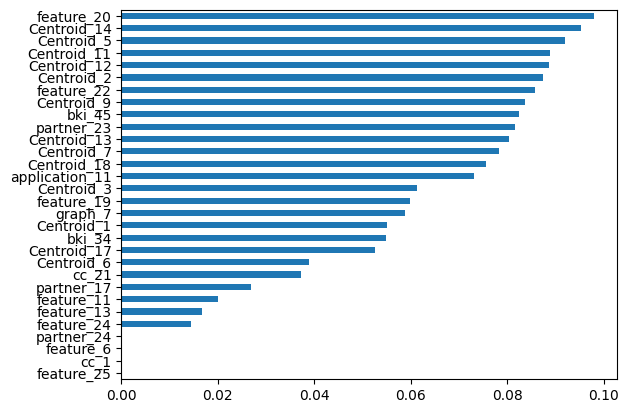

In [21]:
pd.Series(slearner.estimator.feature_importances_, (X_train.columns.to_list() + ['treatment'])).sort_values(ascending=True).head(30).plot(kind='barh')

In [23]:
uplift_preds = slearner.predict(X_valid)

In [24]:
uplift_auc_score(y_true=y_valid, uplift=uplift_preds, treatment=ti_valid)

0.08739173332399387

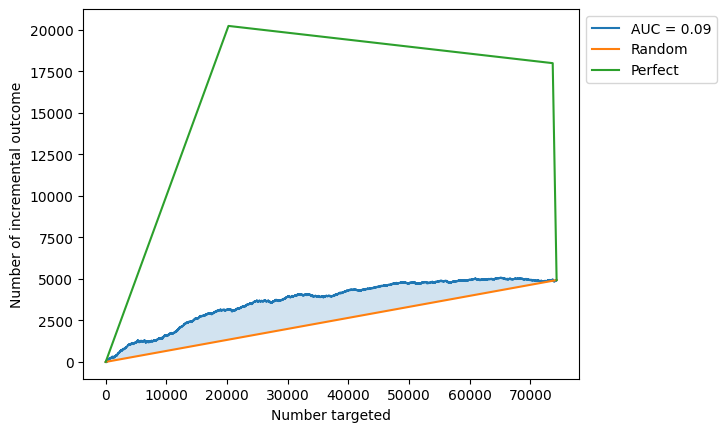

In [25]:
plot_uplift_curve(y_true=y_valid, uplift=uplift_preds, treatment=ti_valid, perfect=True)

In [193]:
X_full_train, y_full_train, ti_full_train = train_data.drop(columns=["successful_utilization", "treatment"]), train_data.loc[:, 'successful_utilization'], train_data.loc[:, 'treatment']
slearner = SoloModel(estimator)
slearner.fit(X=X_full_train, treatment=ti_full_train, y=y_full_train)

0:	learn: 0.6572615	total: 55ms	remaining: 21.9s
50:	learn: 0.4935653	total: 2.74s	remaining: 18.8s
100:	learn: 0.4853866	total: 5.71s	remaining: 16.9s
150:	learn: 0.4805543	total: 8.37s	remaining: 13.8s
200:	learn: 0.4765004	total: 11.1s	remaining: 11s
250:	learn: 0.4734207	total: 13.8s	remaining: 8.2s
300:	learn: 0.4707557	total: 16.5s	remaining: 5.42s
350:	learn: 0.4680105	total: 19.2s	remaining: 2.68s
399:	learn: 0.4657238	total: 21.8s	remaining: 0us
0:	learn: 0.6572400	total: 44.5ms	remaining: 17.8s
50:	learn: 0.4940279	total: 2.27s	remaining: 15.6s
100:	learn: 0.4861449	total: 4.61s	remaining: 13.7s
150:	learn: 0.4805766	total: 6.9s	remaining: 11.4s
200:	learn: 0.4761314	total: 9.11s	remaining: 9.02s
250:	learn: 0.4720588	total: 11.3s	remaining: 6.71s
300:	learn: 0.4689655	total: 13.7s	remaining: 4.49s
350:	learn: 0.4656864	total: 16.2s	remaining: 2.25s
399:	learn: 0.4629416	total: 18.3s	remaining: 0us
0:	learn: 0.6560034	total: 40.8ms	remaining: 16.3s
50:	learn: 0.4937538	total:

SoloModel(estimator=StackingClassifier(estimators=[('1',
                                                    XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  callbacks=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=1,
                                                                  device=None,
                                                                  early_stopping_rounds=None,
                                                                  enable_categorical=False,
                                                                  eval_metric=None,
                                                                  feature_types=None,
                                                                  gamma=None,
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints...
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=4,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=250,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=None, ...)),
                                                   ('2',
                                                    <catboost.core.CatBoostClassifier object at 0x00000192800AC410>)],
                                       final_estimator=LogisticRegression(),
                                       stack_method='predict_proba'))

In [33]:
new_test = df_test.copy()
test_encoded = encoder.transform(new_test)
new_test = pd.concat([new_test, test_encoded], axis=1)
new_test.drop(columns=["cc_2", "cc_4", "cc_6"], inplace=True)

new_test.head()

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,cc_2_encoded,cc_4_encoded,cc_6_encoded
0,0.0,1.0,123.0,0,6.0,96000.0,0.0,0.293391,0.020973,0.0,...,0,0.0,0.0,-1.2,1.0,0,0.561798,0.216805,0.202666,0.240512
1,0.0,1.0,123.0,0,45.0,96000.0,0.0,0.001504,0.020973,0.0,...,0,0.0,1.0,-1.2,1.0,0,0.112360,0.216805,0.202666,0.240512
2,0.0,1.0,2.0,0,13.0,299000.0,0.0,0.025830,0.025830,0.0,...,0,1.0,0.0,-1.2,1.0,0,0.348315,0.342397,0.364983,0.240512
3,0.0,1.0,123.0,1,158.0,140000.0,0.0,0.004579,0.004579,0.0,...,0,1.0,0.0,-1.2,1.0,0,0.314607,0.216805,0.268015,0.240512
4,0.0,1.0,123.0,0,36.0,170000.0,0.0,0.034488,0.034488,0.0,...,0,1.0,0.0,-1.2,1.0,0,0.449438,0.216805,0.202666,0.240512


In [ ]:
uplift_preds = slearner.predict(new_test)


In [56]:
submit = pd.DataFrame(data={'': df_test.index, 'successful_utilization': uplift_preds})
submit.to_csv('submit.csv', index=False)
submit.head()

,,successful_utilization
0,0,0.006090
1,1,0.000776
2,2,0.044566
3,3,0.017917
4,4,0.027959
